In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels
import scikit_posthocs as sp
import sys
import scipy
import matplotlib.colors as colors

In [13]:
glom_volume = pd.read_csv("../csvs/fly_glomeruli_volume.csv")
glom_volume_single_uPN = pd.read_csv("../csvs/fly_glomeruli_volume_feedforward_single_uPN.csv")

In [14]:
#label each glomerulus appropriately 
glom_volume['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs', 'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs',
                            'multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs','multiple uPNs', 'multiple uPNs', 'single uPN','single uPN','single uPN']

glom_volume_single_uPN['glom_pn_type'] = ['single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','single uPN','single uPN','single uPN','single uPN','single uPN',
                            'single uPN','multiple uPNs', 'single uPN']   

In [15]:
#This CSV is created by retrieve_neuron_data.ipynb
rec_synapse_count_data = pd.read_csv('../csvs/recurrent_synapse_count_data.csv')

In [16]:
#converts wide table to long table format for plotting
rec_synapse_count_data_long = pd.melt(rec_synapse_count_data)
rec_synapse_count_data_long = rec_synapse_count_data_long[rec_synapse_count_data_long['value'].notna()]

In [17]:
#populates columns based on glomerulus type for plotting
hue_list_synapse_count = [] 
for row in rec_synapse_count_data_long.iterrows():
    glom = row[1]['variable']
    hue_list_synapse_count.append(glom_volume.loc[glom_volume['glomerulus'] == glom]['glom_pn_type'].values[0]) 

rec_synapse_count_data_long['glomerulus type'] = hue_list_synapse_count
rec_synapse_count_data_long['color'] = rec_synapse_count_data_long['glomerulus type']

rec_synapse_count_data_long = rec_synapse_count_data_long[(rec_synapse_count_data_long['variable']!= 'Glomerulus 2')
                                                                                  & (rec_synapse_count_data_long['variable']!= 'Glomerulus 3')]

glom1_index = rec_synapse_count_data_long.loc[rec_synapse_count_data_long['variable'] == 'Glomerulus 1'].index
glomV_index = rec_synapse_count_data_long.loc[rec_synapse_count_data_long['variable'] == 'V'].index

for cell_index in glom1_index: 
    rec_synapse_count_data_long.at[cell_index,'color'] = 'Glomerulus 1'
for cell_index in glomV_index: 
    rec_synapse_count_data_long.at[cell_index,'color'] = 'V'    

In [18]:
#post hoc tests
uncorrected_recurrent_synapse_count_post_hoc_all = sp.posthoc_mannwhitney(rec_synapse_count_data_long,val_col='value',group_col='variable')

synapse_count_correction_results_all = statsmodels.stats.multitest.multipletests(uncorrected_recurrent_synapse_count_post_hoc_all['Glomerulus 1'], alpha=0.05, method='bonferroni')
corrected_recurrent_synapse_count_post_hoc_all = pd.DataFrame({'Glomerulus': list(uncorrected_recurrent_synapse_count_post_hoc_all['Glomerulus 1'].index),
                                               'significant': synapse_count_correction_results_all[0],
                                               'uncorrected_p_value': uncorrected_recurrent_synapse_count_post_hoc_all['Glomerulus 1'],
                                               'corrected p_value':synapse_count_correction_results_all[1]})
corrected_recurrent_synapse_count_post_hoc_all

,Glomerulus,significant,uncorrected_p_value,corrected p_value
D,D,True,3.538758e-05,0.001840
DA1,DA1,True,3.824356e-07,0.000020
DA2,DA2,True,2.880828e-05,0.001498
DA3,DA3,True,3.714342e-05,0.001931
DA4l,DA4l,True,1.918739e-05,0.000998
DA4m,DA4m,True,1.335369e-05,0.000694
DC1,DC1,True,1.187594e-05,0.000618
DC2,DC2,True,4.365631e-04,0.022701
DC3,DC3,True,5.671853e-05,0.002949
DC4,DC4,True,1.216543e-04,0.006326


In [19]:
recurrent_count_data_long_only_glom_1_medians = rec_synapse_count_data_long.groupby(by=["variable"])["value"].median()
recurrent_count_data_long_only_glom_1_medians = abs(recurrent_count_data_long_only_glom_1_medians - recurrent_count_data_long_only_glom_1_medians['Glomerulus 1'])
recurrent_count_data_medians = pd.DataFrame(recurrent_count_data_long_only_glom_1_medians)
recurrent_count_data_medians['Glomerulus'] = recurrent_count_data_medians.index
recurrent_count_data_medians['p_value']= corrected_recurrent_synapse_count_post_hoc_all['corrected p_value']
recurrent_count_data_medians

,value,Glomerulus,p_value
variable,,,
D,274.5,D,0.001840
DA1,286.5,DA1,0.000020
DA2,288.5,DA2,0.001498
DA3,288.5,DA3,0.001931
DA4l,288.5,DA4l,0.000998
DA4m,287.5,DA4m,0.000694
DC1,278.5,DC1,0.000618
DC2,285.5,DC2,0.022701
DC3,288.5,DC3,0.002949


findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberation Sans' not found.
findfont: Font family 'Liberati

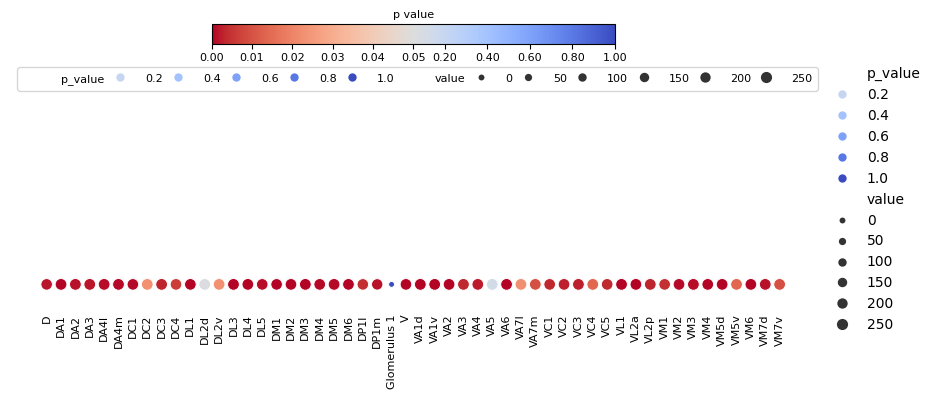

In [20]:
divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=.05, vmax=1)
sm = plt.cm.ScalarMappable(cmap=sns.color_palette("coolwarm", as_cmap=True).reversed(),norm=divnorm)

ax = sns.relplot(data = recurrent_count_data_medians, y = [0.75] * 52, x='Glomerulus',size='value',
            #sizes=relplot_sizing(in_volume_cable_length_medians['value'],10,25),
            #size_order = list(range(len(in_volume_cable_length_medians['sizing']))),
            palette=sns.color_palette("coolwarm", as_cmap=True).reversed() ,hue='p_value',hue_norm=divnorm,height=4, aspect=18/8)
plt.ylim(0.75,1.25)
plt.xticks(rotation=90)
plt.xticks(fontsize=8, fontname="Liberation Sans")
plt.tick_params(left=False,bottom=False)
ax.set_yticklabels([])
ax.set_xlabels("")
legend = plt.legend(loc="upper left", ncol=13, columnspacing=0.10,frameon=None)
for text in legend.texts: 
    text.set_fontsize(8)

cbar = ax.figure.colorbar(sm,ax=plt.gca(),ticks = [0, 0.01,0.02,0.03,0.04,0.05, 0.2, 0.4, 0.6, 0.8, 1],
                          fraction=.2,shrink=0.5,orientation='horizontal',
                          location='top')#,norm=colors.TwoSlopeNorm(vmin=min(in_volume_cable_length_medians['p_value']), vcenter=.05, vmax=max(in_volume_cable_length_medians['p_value'])))#,values=divnorm(in_volume_cable_length_medians['p_value']))
cbar.ax.tick_params(labelsize=8) 
cbar.ax.xaxis.set_ticks_position("bottom")
cbar.set_label('p value', size=8)
#cbar.ax.set_yscale('linear')

sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)

plt.savefig('../svgs/recurrent_count_only_glom_1_relplot.svg', format="svg")
plt.show()